# 1- Importing Libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb               #????? for error of ModuleNotFoundError:    use "!pip install xgboost"

from numpy import savetxt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#import mlfinlab as ml #for clustering feature importance but it seems that it is not working on this python version
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#import shap
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

 # 2- Reading Dataset

In [4]:
## Merging Data

In [5]:
# Read the normalized test and train datasets
test_data = pd.read_csv('normalized_test_data.csv')
train_data = pd.read_csv('normalized_train_data.csv')

# Combine the two datasets into a final merged dataset
merged_data = pd.concat([train_data, test_data], ignore_index=True)

# Save the merged dataset to a CSV file
merged_data.to_csv('Merged_data.csv', index=False)

# Read the merged data for future use
df = pd.read_csv('Merged_data.csv')

## 2-1- Nature of Dataset

In [7]:
df.head()

,output,input1,input2,input3,input4,input5,input6,input7,input8,input9,...,input12,input13,input14,input15,input16,input17,input18,input19,input20,input21
0,0.364444,0.0,0.570312,0.778443,0.543058,0.538462,0.621350,0.314136,0.634801,0.667774,...,0.566327,0.583333,0.361702,0.275362,0.107744,0.247059,0.063545,0.079330,0.496855,0.511770
1,0.408889,0.0,0.574219,0.784431,0.532513,0.538462,0.645285,0.418848,0.602578,0.634551,...,0.515306,0.277778,0.297872,0.275362,0.090909,0.200000,0.063545,0.081564,0.484277,0.450741
2,0.431111,0.0,0.589844,0.782934,0.534271,0.538462,0.645285,0.261780,0.624060,0.568106,...,0.553571,0.388889,0.297872,0.275362,0.090909,0.211765,0.063545,0.082682,0.471698,0.485615
3,0.440000,0.0,0.580078,0.782934,0.532513,0.538462,0.645285,0.261780,0.613319,0.601329,...,0.642857,0.388889,0.340426,0.275362,0.090909,0.258824,0.063545,0.083799,0.471698,0.572799
4,0.422222,0.0,0.589844,0.796407,0.525483,0.538462,0.645285,0.261780,0.613319,0.568106,...,0.655612,0.444444,0.340426,0.347826,0.090909,0.223529,0.063545,0.083799,0.471698,0.564080


In [8]:
df.keys ()

Index(['output', 'input1', 'input2', 'input3', 'input4', 'input5', 'input6',
       'input7', 'input8', 'input9', 'input10', 'input11', 'input12',
       'input13', 'input14', 'input15', 'input16', 'input17', 'input18',
       'input19', 'input20', 'input21'],
      dtype='object')

In [9]:
len(df)

10979

# 3- EDA

## 3-1- Cleaning Dataset

In [12]:
df['output'] = df['output'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input1'] = df['input1'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input2'] = df['input2'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input3'] = df['input3'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input4'] = df['input4'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input5'] = df['input5'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input6'] = df['input6'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input7'] = df['input7'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input8'] = df['input8'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input9'] = df['input9'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input10'] = df['input10'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input11'] = df['input11'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input12'] = df['input12'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input13'] = df['input13'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input14'] = df['input14'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input15'] = df['input15'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input16'] = df['input16'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input17'] = df['input17'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input18'] = df['input18'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input19'] = df['input19'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input20'] = df['input20'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”
df['input21'] = df['input21'].replace([' ',','],'',regex=True)    # modifying , and spaces in column of 'Survived' of dataframe of “data”

## 3-2- Checking whether ther is NAN values or not

In [14]:
df.isnull().sum()  #how many null values are there in each columns of “data”

output     0
input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
input15    0
input16    0
input17    0
input18    0
input19    0
input20    0
input21    0
dtype: int64

## 3-3- Cleaning Outliers
##### Due to the fact that there are some outliers distributed badly throughout the various input parameters I need to delet them using the Z=3 (Z-Score or Standard Deviation Threshold)

In [18]:
from scipy import stats
df_cleaned = df[(np.abs(stats.zscore(df.iloc[:, 1:])) < 3).all(axis=1)]


In [25]:
len(df)

10979

In [28]:
len(df_cleaned)

9579

# 4- Feature Importance (FI) Analysis

## 4-1- Correlation Matrix

output     1.000000
input19    0.344174
input9     0.332565
input3     0.317945
input20    0.250181
input16    0.248244
input13    0.220680
input17    0.218289
input21    0.209657
input4     0.193632
input14    0.180195
input15    0.124070
input12    0.057206
input6     0.037773
input2    -0.044420
input8    -0.095595
input11   -0.098750
input5    -0.148188
input1    -0.159236
input18   -0.187835
input10   -0.246254
input7    -0.285181
Name: output, dtype: float64


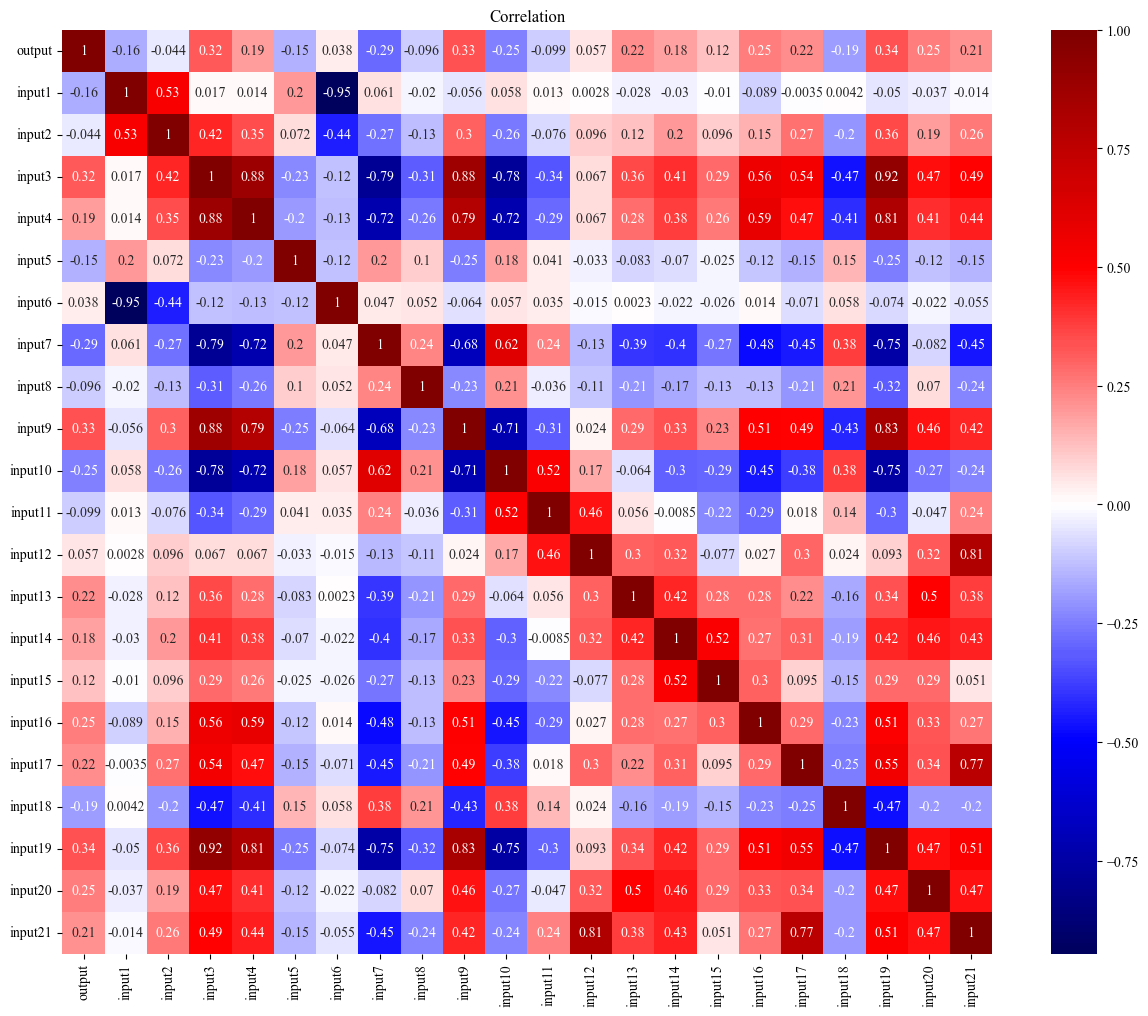

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Compute correlation matrix
corr = df_cleaned.corr(method='pearson')  # You can change 'pearson' to 'spearman' or 'kendall' as needed

# Create the heatmap with blue for positive and red for negative
fig = plt.figure(figsize=(15, 12))
r = sns.heatmap(corr, cmap='seismic', annot=True, center=0)

# Set the title for the heatmap
r.set_title("Correlation")

# Sort the correlation to find the most influential features on "output"
# Replace "output" with the actual column name for the feature you're targeting
corr_sorted = corr.sort_values(by=["output"], ascending=False).iloc[0].sort_values(ascending=False)
print(corr_sorted)

# Save the figure (uncomment if needed)
# image_format = 'JPEG'  # e.g .png, .svg, .eps etc.
# image_name = 'myimage.JPEG'
# fig.savefig(image_name, format=image_format, dpi=1000)
plt.savefig('FI_CM.png')

plt.show()


## 4-2- Using Regressors

In [13]:

X = df_cleaned.iloc[:, [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]
Y = df_cleaned.iloc[:, 0]
X.columns = X.columns.astype(str)
#Y                             
#X

### 4-2-1- FI using DT regressor

Feature: 0, Score: 0.01818
Feature: 1, Score: 0.07811
Feature: 2, Score: 0.11462
Feature: 3, Score: 0.13592
Feature: 4, Score: 0.02936
Feature: 5, Score: 0.14230
Feature: 6, Score: 0.01200
Feature: 7, Score: 0.02222
Feature: 8, Score: 0.02068
Feature: 9, Score: 0.03644
Feature: 10, Score: 0.02776
Feature: 11, Score: 0.02330
Feature: 12, Score: 0.03577
Feature: 13, Score: 0.02400
Feature: 14, Score: 0.01035
Feature: 15, Score: 0.02210
Feature: 16, Score: 0.02667
Feature: 17, Score: 0.00879
Feature: 18, Score: 0.16905
Feature: 19, Score: 0.02184
Feature: 20, Score: 0.02053


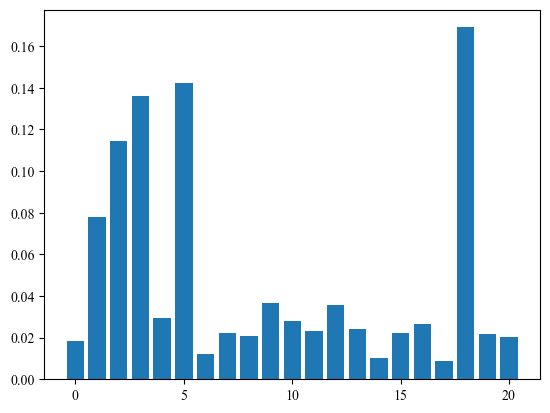

In [14]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig('FI_DT.png')

plt.show()

### 4-2-2- FI using RF regressor

Feature: 0, Score: 0.01963
Feature: 1, Score: 0.08572
Feature: 2, Score: 0.10302
Feature: 3, Score: 0.13399
Feature: 4, Score: 0.02489
Feature: 5, Score: 0.14320
Feature: 6, Score: 0.01415
Feature: 7, Score: 0.02989
Feature: 8, Score: 0.02432
Feature: 9, Score: 0.03554
Feature: 10, Score: 0.02707
Feature: 11, Score: 0.02304
Feature: 12, Score: 0.03654
Feature: 13, Score: 0.02251
Feature: 14, Score: 0.01188
Feature: 15, Score: 0.02703
Feature: 16, Score: 0.02918
Feature: 17, Score: 0.00726
Feature: 18, Score: 0.15970
Feature: 19, Score: 0.01848
Feature: 20, Score: 0.02297


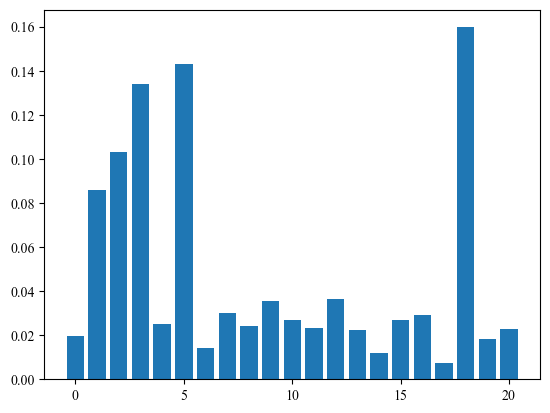

In [15]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X,Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig('FI_RF.png')

plt.show()

### 4-2-3- FI using XGB regressor

Feature: 0, Score: 0.05765
Feature: 1, Score: 0.04282
Feature: 2, Score: 0.07197
Feature: 3, Score: 0.09672
Feature: 4, Score: 0.05262
Feature: 5, Score: 0.09444
Feature: 6, Score: 0.02040
Feature: 7, Score: 0.02501
Feature: 8, Score: 0.02571
Feature: 9, Score: 0.03240
Feature: 10, Score: 0.02226
Feature: 11, Score: 0.02689
Feature: 12, Score: 0.04451
Feature: 13, Score: 0.01941
Feature: 14, Score: 0.02230
Feature: 15, Score: 0.06740
Feature: 16, Score: 0.03155
Feature: 17, Score: 0.02114
Feature: 18, Score: 0.16403
Feature: 19, Score: 0.03487
Feature: 20, Score: 0.02591


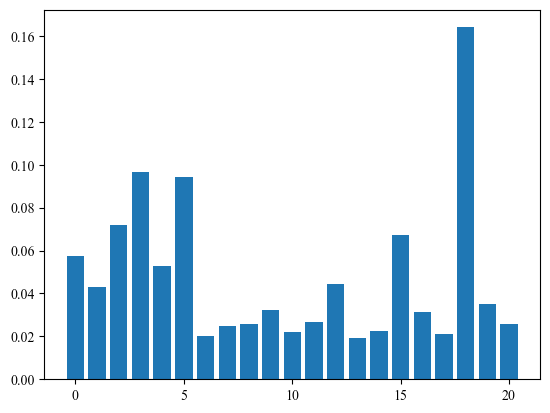

In [16]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor


# define the model
model = XGBRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig('FI_XGB.png')

plt.show()

# 5- Visualuzation 

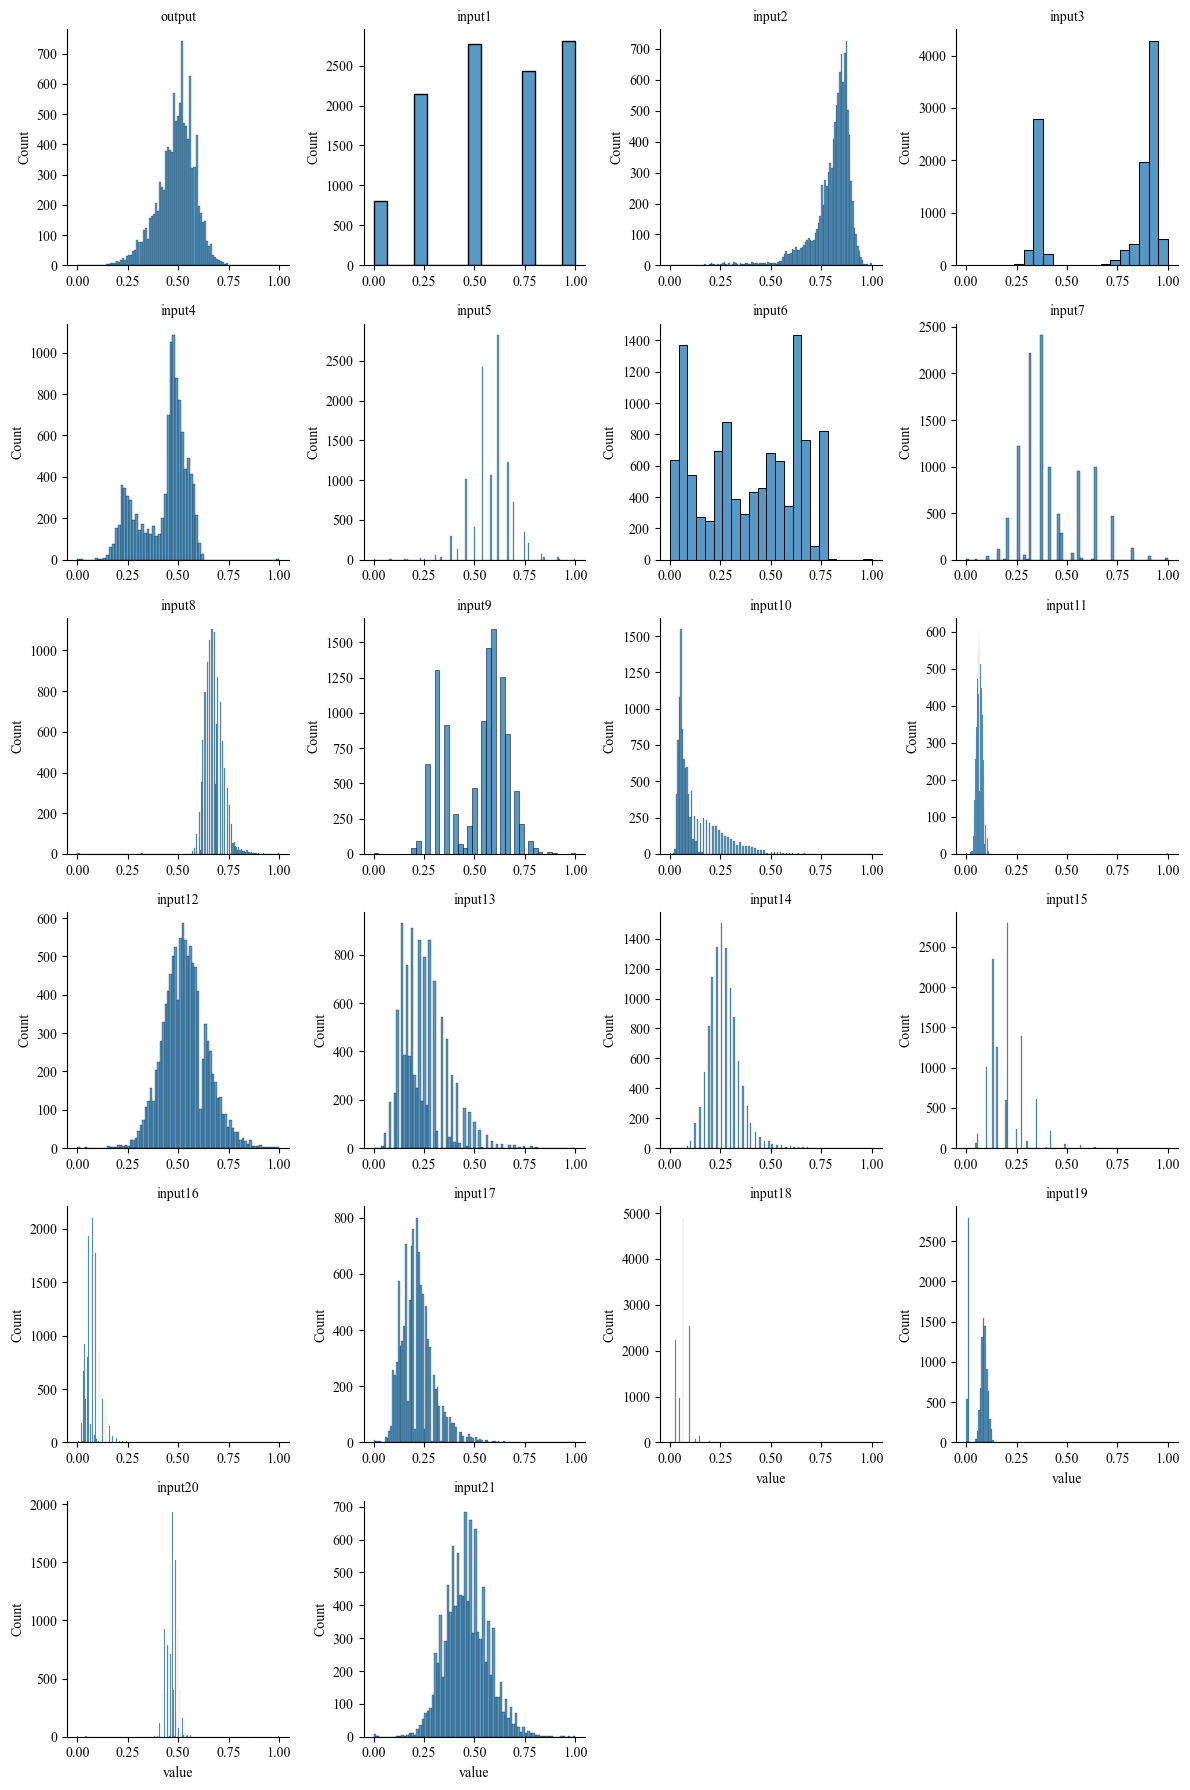

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns = ["output", "input1", "input2", "input3", "input4", "input5", "input6", 
           "input7", "input8", "input9", "input10", "input11", "input12", 
           "input13", "input14", "input15", "input16", "input17", "input18", 
           "input19", "input20", "input21"]

# Create a FacetGrid
g = sns.FacetGrid(df.melt(value_vars=columns), col="variable", col_wrap=4, sharex=False, sharey=False)

# Map displot to the FacetGrid
g.map(sns.histplot, "value")

# Adjust the layout for better display
g.set_titles("{col_name}")
g.fig.tight_layout()
plt.savefig('histplot.png')

plt.show()


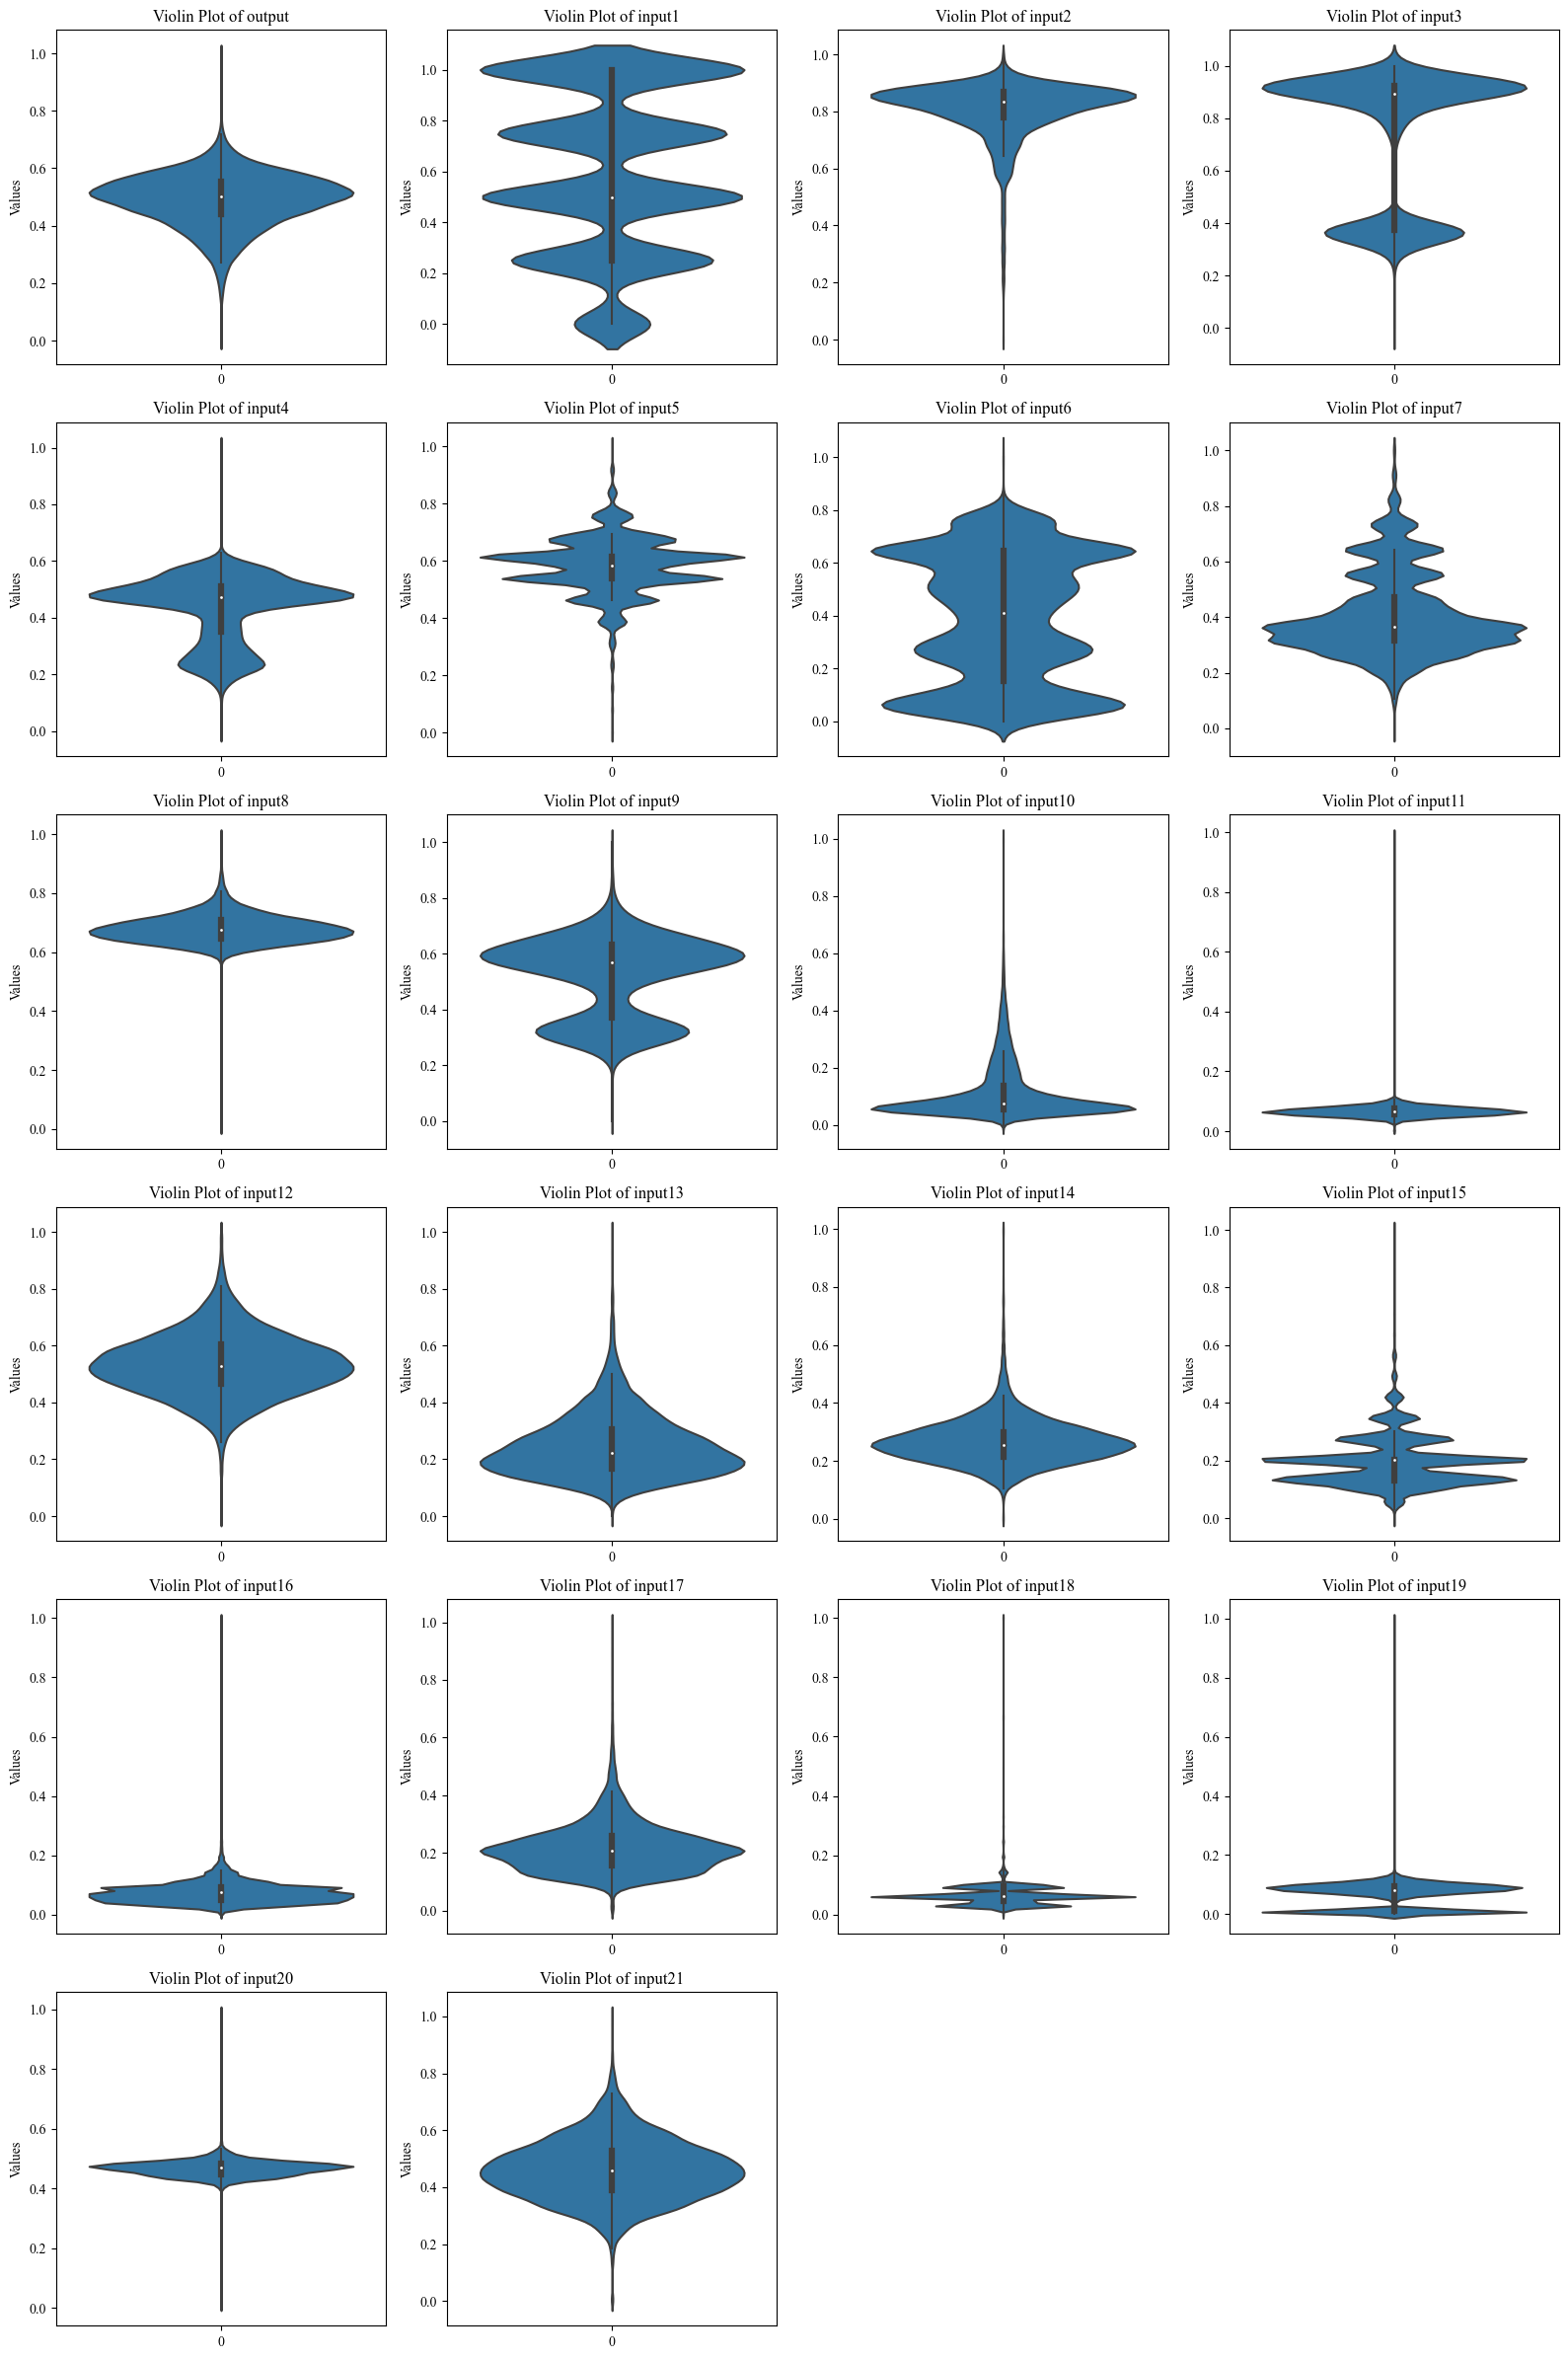

In [18]:


# List of columns to plot
columns = ["output", "input1", "input2", "input3", "input4", "input5", "input6", 
           "input7", "input8", "input9", "input10", "input11", "input12", 
           "input13", "input14", "input15", "input16", "input17", "input18", 
           "input19", "input20", "input21"]

# Create subplots for each variable
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 24))
axes = axes.flatten()

# Loop through the columns and create violin plots
for i, col in enumerate(columns):
    sns.violinplot(data=df[col], ax=axes[i], inner='box', showmeans=True)
    axes[i].set_title(f"Violin Plot of {col}")
    axes[i].set_ylabel('Values')

# Remove any unused subplots if the number of columns is less than the grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig('violinplot.png')

plt.show()


# 6- Delleting unnecessary features and Splitting Dataset (train-validation-test)

#### According to the results from FI following features were chosen to be deleted from furthur evaluation (7, 15, 18)

In [19]:

X = df_cleaned.iloc[:, [ 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21]]
Y = df_cleaned.iloc[:, 0]
X.columns = X.columns.astype(str)
#Y                             
#X

In [21]:
from sklearn.model_selection import train_test_split

# First split into training and temporary sets (80% train, 20% temp)
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=0)

# Now split the temporary set into validation and test sets (50% of temp, so 10% of the total each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=0)



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7663, 18)
(7663,)
(958, 18)
(958,)


# 7- Training Models

MAPE’s Sensitivity to Scaling: MAPE is generally sensitive to the scale of the data, as it’s designed to work with absolute percentage differences relative to the original values. When data is standardized, the absolute percentage loses meaning, making MAPE a less suitable metric.

## 7-1- SVR reg

### 7-1-1- SVR first taining

In [22]:
from sklearn.svm import SVR
regressorSVR = SVR()          #kernel='rbf'
regressorSVR.fit(x_train,y_train)

SVR()

### 7-1-2- SVR cross_validation

In [23]:
#After training the model, we'll check the model training score.
scores_SVR = cross_val_score(regressorSVR, x_train, y_train,cv=10)
print("Mean cross-validation score: {:.2f} %".format(scores_SVR.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores_SVR.std()*100))

Mean cross-validation score: 40.57 %
Standard Deviation: 3.77 %


### 7-1-3- Hyperparameter tuning of SVR

In [24]:
parameters = [{'degree': [1, 2, 3, 4], 
               'kernel': ['linear','poly','rbf'],
               'gamma': ['scale','auto']}]

In [25]:
grid_search = GridSearchCV(
    estimator=regressorSVR,
    param_grid=parameters,
    scoring = 'r2',   #scoring should be wisely chosen accrding to your problem(class. or reg.) (e.g., 'r2' for reg and 'accuracy' for class.)
    n_jobs = -1,
    cv = 5,
    verbose=True,
    error_score="raise"
)

In [26]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, error_score='raise', estimator=SVR(), n_jobs=-1,
             param_grid=[{'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='r2', verbose=True)

In [27]:
grid_search.best_estimator_

SVR(degree=1)

In [28]:
best_score = grid_search.best_score_
print("Best Score (r2): {:.2f} %".format(best_score*100))

Best Score (r2): 40.34 %


In [29]:
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [30]:
degree=best_parameters['degree']
gamma=best_parameters['gamma']
kernel=best_parameters['kernel']

### 7-1-4- Modifing paramaters for Training and making prediction

In [31]:
regressorSVR = SVR(
    kernel=kernel,
    gamma=gamma,
    degree=degree,
)          
regressorSVR.fit(x_train,y_train)


SVR(degree=1)

In [32]:
predictionsSVR = regressorSVR.predict(x_val)
savetxt('predictionsSVR.csv', predictionsSVR, delimiter=',')

In [33]:
rmse = np.sqrt(mean_squared_error(y_val, predictionsSVR))
print("RMSE: %f" % (rmse))

RMSE: 0.070484


In [34]:
from sklearn.metrics import r2_score
r2 = (r2_score(y_val, predictionsSVR))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.410756


In [35]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, predictionsSVR)
print("Mean Absolute Error (MAE): %f" % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_val - predictionsSVR) / y_val)) * 100
print("Mean Absolute Percentage Error (MAPE): %f%%" % mape)

Mean Absolute Error (MAE): 0.054880
Mean Absolute Percentage Error (MAPE): 12.668282%


### 7-1-5- Plots

#### 7-1-5-1- Validation Plot

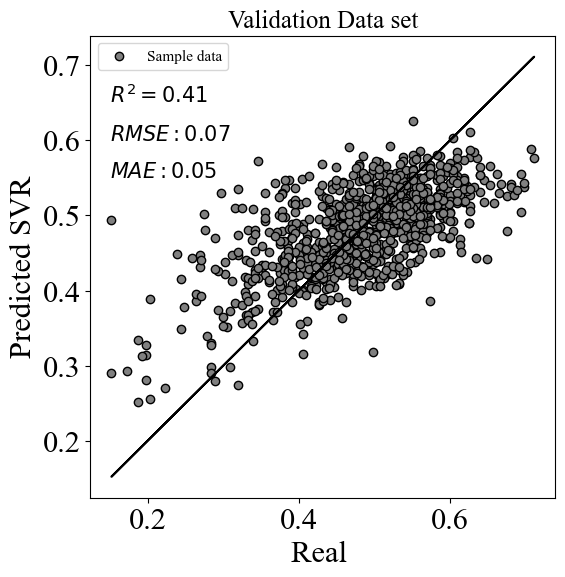

In [36]:
import matplotlib.pyplot as plt

# Set global font format to Times New Roman and adjust font size
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 22})

# Create a figure and axis with a specified size
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot with the corrected 'label' argument
ax.scatter(y_val, predictionsSVR, edgecolor='k', facecolor='grey', alpha=1, label='Sample data')

# Set labels and title
ax.set_ylabel('Predicted SVR')
ax.set_xlabel('Real ')
ax.set_title('Validation Data set', fontsize=18)

# Plot the 1:1 line
plt.plot(y_val, y_val, 'black')

# Add RMSE, R-squared, MAE, MAPE  text to the plot
plt.text(0.15, 0.6, '$RMSE: %.2f$' % rmse, fontsize=15)
plt.text(0.15, 0.65, '$R^2= %.2f$' % r2, fontsize=15)
plt.text(0.15, 0.55, '$MAE: %.2f$' % mae, fontsize=15)

# Display the legend
ax.legend(facecolor='white', fontsize=11)

# Save the figure to a file
plt.savefig('Val_ModelI_SVR.png')

# Show the plot
plt.show()


#### 7-1-5-2- Train Plot

In [37]:
predictionSVRtrain = regressorSVR.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, predictionSVRtrain))
print("RMSE: %f" % (rmse))


RMSE: 0.069230


In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, predictionSVRtrain)
print("R_Squared Score : %f" % (r2))


R_Squared Score : 0.429756


In [39]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, predictionSVRtrain)
print("Mean Absolute Error (MAE): %f" % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_train - predictionSVRtrain) / y_train)) * 100
print("Mean Absolute Percentage Error (MAPE): %f%%" % mape)

Mean Absolute Error (MAE): 0.053602
Mean Absolute Percentage Error (MAPE): inf%


##### Why Mean Absolute Percentage Error (MAPE): inf%

In [40]:
import pandas as pd
import numpy as np

# Ensure y_train is a NumPy array for compatibility
y_train_array = np.array(y_train)

# Convert y_train to a DataFrame and save it as a CSV file
y_train_df = pd.DataFrame(y_train_array, columns=['y_train'])
y_train_df.to_csv("y_train_values.csv", index=False)

print("y_train values saved to 'y_train_values.csv'")


y_train values saved to 'y_train_values.csv'


In [41]:
import numpy as np

# Check if there are any zeros in y_train
zero_count = np.sum(y_train == 0)
if zero_count > 0:
    print(f"There are {zero_count} zero values in y_train, which may cause division by zero in MAPE calculation.")
    
    # Optional: Display the indices of zero values
    zero_indices = np.where(y_train == 0)[0]
    print("Indices of zeros in y_train:", zero_indices)
else:
    print("No zero values found in y_train.")


There are 2 zero values in y_train, which may cause division by zero in MAPE calculation.
Indices of zeros in y_train: [547 811]


#### 7-1-5-2- Train Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


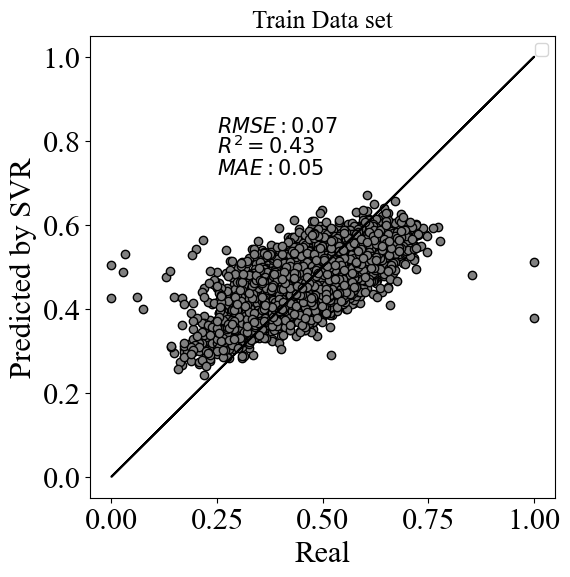

In [42]:
plt.rcParams["font.family"] = "Times New Roman"   #change the global format of fonts to time new roman
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_train, predictionSVRtrain, edgecolor='k', facecolor='grey', alpha=1) #label='Sample data'
ax.set_ylabel('Predicted by SVR')
ax.set_xlabel('Real')
ax.legend(facecolor='white', fontsize=11)
plt.plot(y_train, y_train ,'black')   #ploting the 1:1 line

# Add RMSE, R-squared, MAE, MAPE  text to the plot
plt.text(0.25, 0.82, '$RMSE: %.2f$' % rmse, fontsize=15)
plt.text(0.25, 0.77, '$R^2= %.2f$' % r2, fontsize=15)
plt.text(0.25, 0.72, '$MAE: %.2f$' % mae, fontsize=15)

ax.set_title('Train Data set', fontsize=18)

plt.savefig('Train_ModelI_SVR.png')

3 justifying the deleting 0

## 7-2- RF reg

### 7-2-1-  RF first Training

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressorRF = RandomForestRegressor()
regressorRF.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
### 7-2-2-  RF reg. cross_Validation

In [45]:
#After training the model, we'll check the model training score.
scores_RF = cross_val_score(regressorRF, x_train, y_train,cv=10)
print("Mean cross-validation score: {:.2f} %".format(scores_RF.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores_RF.std()*100))

Mean cross-validation score: 51.34 %
Standard Deviation: 4.12 %


In [46]:
### 7-2-3- Hyper parameter tuning of RF reg

In [47]:
parameters = [{ 'n_estimators': [50, 100 ],
              
    'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
    'max_features': [4, 5, "sqrt"]
}]


In [48]:
grid_search = GridSearchCV(
    estimator=regressorRF,
    param_grid=parameters,
    scoring = 'r2',   #scoring should be wisely chosen accrding to your problem(class. or reg.) (e.g., 'r2' for reg and 'accuracy' for class.)
    n_jobs = -1,
    cv = 5,
    verbose=True,
    error_score="raise"
)

In [49]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid=[{'criterion': ['squared_error', 'absolute_error',
                                        'friedman_mse', 'poisson'],
                          'max_features': [4, 5, 'sqrt'],
                          'n_estimators': [50, 100]}],
             scoring='r2', verbose=True)

In [50]:
predictionsRF = regressorRF.predict(x_val)
savetxt('predictionsRF.csv', predictionsRF, delimiter=',')


In [51]:
rmse = np.sqrt(mean_squared_error(y_val, predictionsRF))
print("RMSE: %f" % (rmse))


RMSE: 0.062564


In [52]:
from sklearn.metrics import r2_score
r2 = (r2_score(y_val, predictionsRF))
print("R_Squared Score : %f" % (r2))


R_Squared Score : 0.535741


In [53]:

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, predictionsRF)
print("Mean Absolute Error (MAE): %f" % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_val - predictionsRF) / y_val)) * 100
print("Mean Absolute Percentage Error (MAPE): %f%%" % mape)


Mean Absolute Error (MAE): 0.047205
Mean Absolute Percentage Error (MAPE): 11.145381%


### 7-2-5- Plots


#### 7-2-5-1- Validation Plot

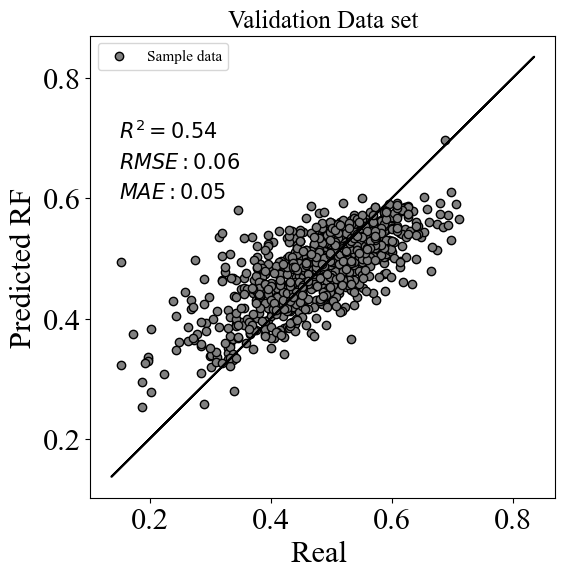

In [54]:


import matplotlib.pyplot as plt

# Set globalb font format to Times New Roman and adjust font size
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 22})

# Create a figure and axis with a specified size
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot with the corrected 'label' argument
ax.scatter(y_val, predictionsRF, edgecolor='k', facecolor='grey', alpha=1, label='Sample data')

# Set labels and title
ax.set_ylabel('Predicted RF')
ax.set_xlabel('Real ')
ax.set_title('Validation Data set', fontsize=18)

# Plot the 1:1 line
plt.plot(y_test, y_test, 'black')

# Add RMSE, R-squared, MAE, MAPE  text to the plot
plt.text(0.15, 0.65, '$RMSE: %.2f$' % rmse, fontsize=15)
plt.text(0.15, 0.7, '$R^2= %.2f$' % r2, fontsize=15)
plt.text(0.15, 0.6, '$MAE: %.2f$' % mae, fontsize=15)


# Display the legend
ax.legend(facecolor='white', fontsize=11)

# Save the figure to a file
plt.savefig('Val_ModelI_RF.png')

# Show the plot
plt.show()


#### 7-2-5-2- Train Plot


In [55]:
predictionRFtrain = regressorRF.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, predictionRFtrain))
print("RMSE: %f" % (rmse))


from sklearn.metrics import r2_score
r2 = r2_score(y_train, predictionRFtrain)
print("R_Squared Score : %f" % (r2))


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, predictionRFtrain)
print("Mean Absolute Error (MAE): %f" % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_train - predictionRFtrain) / y_train)) * 100


RMSE: 0.023688
R_Squared Score : 0.933240
Mean Absolute Error (MAE): 0.017540


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


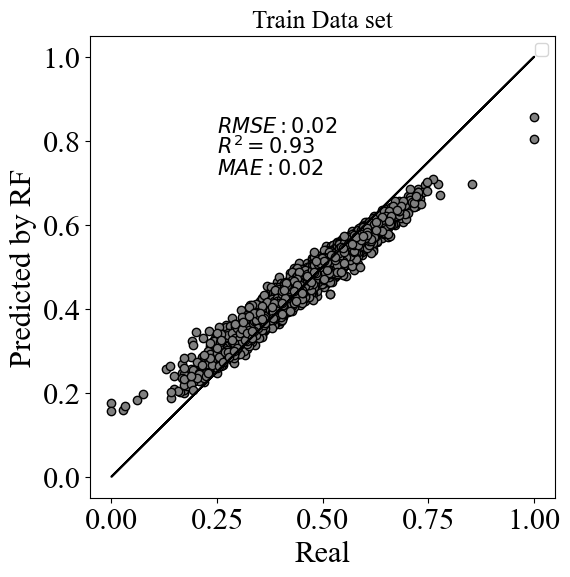

In [56]:
plt.rcParams["font.family"] = "Times New Roman"   #change the global format of fonts to time new roman
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_train, predictionRFtrain, edgecolor='k', facecolor='grey', alpha=1) #label='Sample data'
ax.set_ylabel('Predicted by RF')
ax.set_xlabel('Real')
ax.legend(facecolor='white', fontsize=11)
plt.plot(y_train, y_train ,'black')   #ploting the 1:1 line

# Add RMSE, R-squared, MAE, MAPE  text to the plot
plt.text(0.25, 0.82, '$RMSE: %.2f$' % rmse, fontsize=15)
plt.text(0.25, 0.77, '$R^2= %.2f$' % r2, fontsize=15)
plt.text(0.25, 0.72, '$MAE: %.2f$' % mae, fontsize=15)

ax.set_title('Train Data set', fontsize=18)

plt.savefig('Train_ModelI_RF.png')

## 7-3- XGB reg

In [57]:
regressorXGB = xgb.XGBRegressor()

In [58]:
regressorXGB.fit(x_train,y_train)
predictionXGB1 = regressorXGB.predict(x_val)
#savetxt('predictionXGB.csv', predictionXGB, delimiter=',')

In [59]:
rmse = np.sqrt(mean_squared_error(y_val, predictionXGB1))
print("RMSE: %f" % (rmse))

RMSE: 0.064692


In [60]:
from sklearn.metrics import r2_score
r2 = r2_score(y_val, predictionXGB1)
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.503610


In [61]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, predictionXGB1)
print("Mean Absolute Error (MAE): %f" % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_val - predictionXGB1) / y_val)) * 100
print("Mean Absolute Percentage Error (MAPE): %f%%" % mape)



Mean Absolute Error (MAE): 0.049032
Mean Absolute Percentage Error (MAPE): 11.353483%


####  7-3-1-  Result Plot 
##### 7-3-1-1- Val Data set

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


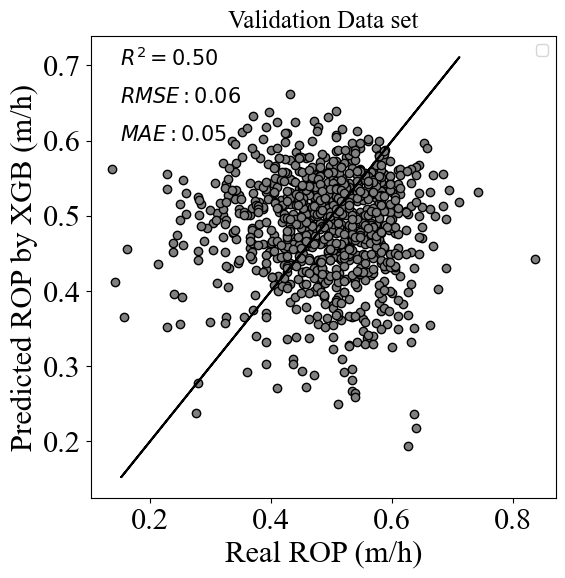

In [62]:
plt.rcParams["font.family"] = "Times New Roman"   #change the global format of fonts to time new roman
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_test, predictionXGB1, edgecolor='k', facecolor='grey', alpha=1) #label='Sample data'
ax.set_ylabel('Predicted ROP by XGB (m/h)')
ax.set_xlabel('Real ROP (m/h)')
ax.legend(facecolor='white', fontsize=11)
plt.plot(y_val, y_val ,'black')   #ploting the 1:1 line

# Add RMSE, R-squared, MAE, MAPE  text to the plot
plt.text(0.15, 0.65, '$RMSE: %.2f$' % rmse, fontsize=15)
plt.text(0.15, 0.7, '$R^2= %.2f$' % r2, fontsize=15)
plt.text(0.15, 0.6, '$MAE: %.2f$' % mae, fontsize=15)

ax.set_title('Validation Data set', fontsize=18)


#fig.tight_layout()

#ax.set_title('RMSE: %f' % rmse, fontsize=18)
#plt.style.use('default')
#plt.style.use('ggplot')
plt.savefig('Val_ModelI_XGB.png')

In [63]:
##### 7-3-1-2- Train Data set


In [64]:
predictionXGBtrain = regressorXGB.predict(x_train)

In [65]:
rmse = np.sqrt(mean_squared_error(y_train, predictionXGBtrain))
print("RMSE: %f" % (rmse))

RMSE: 0.032714


In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, predictionXGBtrain)
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.872671


In [67]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, predictionXGBtrain)
print("Mean Absolute Error (MAE): %f" % mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_train - predictionXGBtrain) / y_train)) * 100
print("Mean Absolute Percentage Error (MAPE): %f%%" % mape)


Mean Absolute Error (MAE): 0.024455
Mean Absolute Percentage Error (MAPE): inf%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


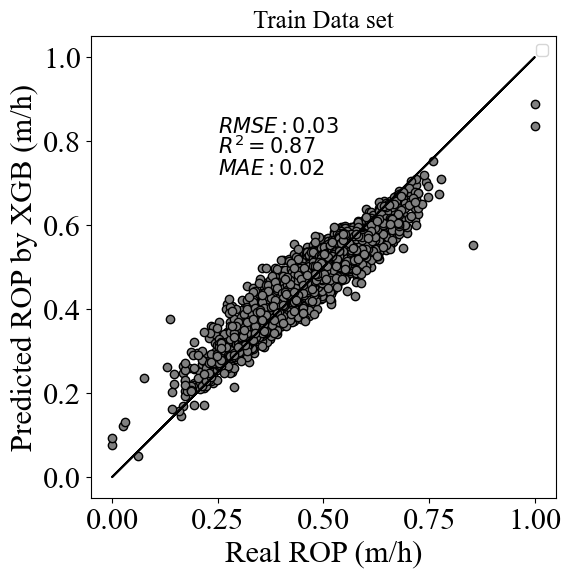

In [68]:
plt.rcParams["font.family"] = "Times New Roman"   #change the global format of fonts to time new roman
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_train, predictionXGBtrain, edgecolor='k', facecolor='grey', alpha=1) #label='Sample data'
ax.set_ylabel('Predicted ROP by XGB (m/h)')
ax.set_xlabel('Real ROP (m/h)')
ax.legend(facecolor='white', fontsize=11)
plt.plot(y_train,y_train ,'black')   #ploting the 1:1 line

# Add RMSE, R-squared, MAE, MAPE  text to the plot
plt.text(0.25, 0.82, '$RMSE: %.2f$' % rmse, fontsize=15)
plt.text(0.25, 0.77, '$R^2= %.2f$' % r2, fontsize=15)
plt.text(0.25, 0.72, '$MAE: %.2f$' % mae, fontsize=15)

ax.set_title('Train Data set', fontsize=18)

plt.savefig('Train_ModelI_XGB.png')

## 7-4- DT reg

Mean cross-validation score: -4.44 %
Standard Deviation: 9.50 %
Fitting 5 folds for each of 24 candidates, totalling 120 fits
RMSE: 0.089543
R_Squared Score: 0.049008
Mean Absolute Error (MAE): 0.067503
Mean Absolute Percentage Error (MAPE): nan%


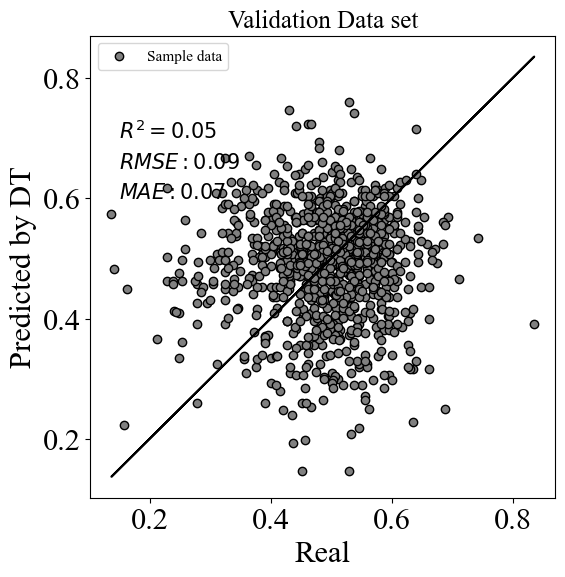

RMSE: 0.000000
R_Squared Score: 1.000000
Mean Absolute Error (MAE): 0.000000
Mean Absolute Percentage Error (MAPE): 0.000000%


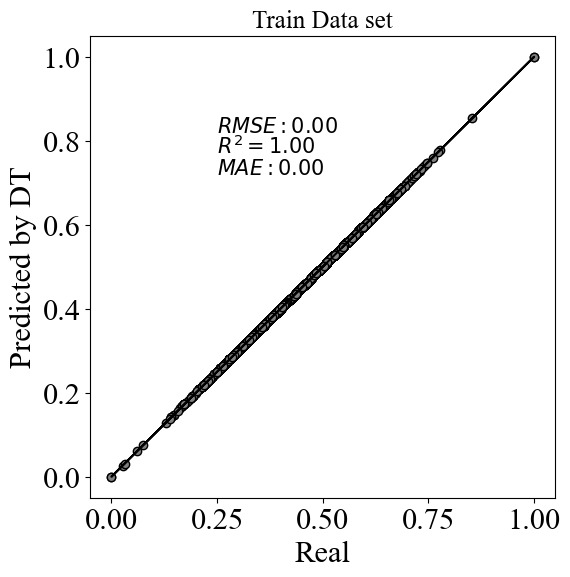

In [69]:
### Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from numpy import savetxt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

### 6-4-1- Decision Tree first Training
regressorDT = DecisionTreeRegressor()
regressorDT.fit(x_train, y_train)

### 6-2-2- Decision Tree reg. cross_Validation
# After training the model, we'll check the model training score.
scores_DT = cross_val_score(regressorDT, x_train, y_train, cv=10)
print("Mean cross-validation score: {:.2f} %".format(scores_DT.mean() * 100))
print("Standard Deviation: {:.2f} %".format(scores_DT.std() * 100))

### 6-2-3- Hyperparameter tuning of Decision Tree regressor
parameters = [{
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_features': [4, 5, "sqrt"]
}]

grid_search = GridSearchCV(
    estimator=regressorDT,
    param_grid=parameters,
    scoring='r2',  # Using R2 for regression problems
    n_jobs=-1,
    cv=5,
    verbose=True,
    error_score="raise"
)

grid_search.fit(x_train, y_train)

# Prediction and Evaluation on Test Set
predictionsDT = regressorDT.predict(x_val)
savetxt('predictionsDT.csv', predictionsDT, delimiter=',')

rmse = np.sqrt(mean_squared_error(y_val, predictionsDT))
print("RMSE: %f" % rmse)

r2 = r2_score(y_val, predictionsDT)
print("R_Squared Score: %f" % r2)

mae = mean_absolute_error(y_val, predictionsDT)
print("Mean Absolute Error (MAE): %f" % mae)

mape = np.mean(np.abs((y_val - predictionsDT) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE): %f%%" % mape)

### 6-1-5- Test Plot

# Set global font format to Times New Roman and adjust font size
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, predictionsDT, edgecolor='k', facecolor='grey', alpha=1, label='Sample data')
ax.set_ylabel('Predicted by DT')
ax.set_xlabel('Real')
ax.set_title('Validation Data set', fontsize=18)
plt.plot(y_test, y_test, 'black')

plt.text(0.15, 0.65, '$RMSE: %.2f$' % rmse, fontsize=15)
plt.text(0.15, 0.7, '$R^2= %.2f$' % r2, fontsize=15)
plt.text(0.15, 0.6, '$MAE: %.2f$' % mae, fontsize=15)


ax.legend(facecolor='white', fontsize=11)
plt.savefig('Val_ModelI_DT.png')
plt.show()

### 6-1-5- Train Plot

# Predictions and Evaluation on Train Set
predictionDTtrain = regressorDT.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictionDTtrain))
print("RMSE: %f" % rmse_train)

r2_train = r2_score(y_train, predictionDTtrain)
print("R_Squared Score: %f" % r2_train)

mae_train = mean_absolute_error(y_train, predictionDTtrain)
print("Mean Absolute Error (MAE): %f" % mae_train)

mape_train = np.mean(np.abs((y_train - predictionDTtrain) / y_train)) * 100
print("Mean Absolute Percentage Error (MAPE): %f%%" % mape_train)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_train, predictionDTtrain, edgecolor='k', facecolor='grey', alpha=1)
ax.set_ylabel('Predicted by DT')
ax.set_xlabel('Real')
plt.plot(y_train, y_train, 'black')

plt.text(0.25, 0.82, '$RMSE: %.2f$' % rmse_train, fontsize=15)
plt.text(0.25, 0.77, '$R^2= %.2f$' % r2_train, fontsize=15)
plt.text(0.25, 0.72, '$MAE: %.2f$' % mae_train, fontsize=15)

ax.set_title('Train Data set', fontsize=18)
plt.savefig('Train_ModelI_DT.png')
plt.show()


# 8- Predictions based on Test dataset

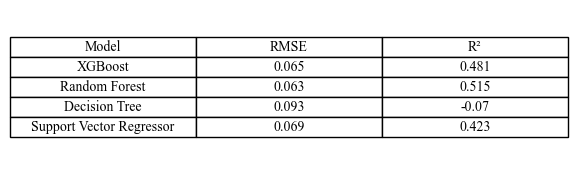

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already trained these regressors
regressors = {
    "XGBoost": regressorXGB,
    "Random Forest": regressorRF,
    "Decision Tree": regressorDT,
    "Support Vector Regressor": regressorSVR
}

# Initialize an empty list to store the results
results = []

# Evaluate each regressor
for name, model in regressors.items():
    # Make predictions
    predictions = model.predict(x_test)
    
    # Calculate RMSE and R², rounding to 3 decimal places
    rmse = round(np.sqrt(mean_squared_error(y_test, predictions)), 3)
    r2 = round(r2_score(y_test, predictions), 3)
    
    # Append the results as a dictionary
    results.append({
        "Model": name,
        "RMSE": rmse,
        "R²": r2
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the table and save as an image
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust figure size as needed
ax.axis('off')  # Turn off the axis

# Create the table and add it to the plot
table = plt.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust scaling as needed

# Save the table as an image file
plt.savefig("regression_metrics_table.png", dpi=300, bbox_inches='tight')
plt.show()


# 9- Saving the algorithms

In [71]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [72]:
import joblib


In [73]:
joblib.dump(regressorSVR, 'regressorSVR.pkl')



['regressorSVR.pkl']

In [74]:
joblib.dump(regressorXGB, 'regressorXGB.pkl')


['regressorXGB.pkl']

In [75]:
joblib.dump(regressorRF, 'regressorRF.pkl')


['regressorRF.pkl']

In [76]:
joblib.dump(regressorDT, 'regressorDT.pkl')

['regressorDT.pkl']